<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day2_Gaussian_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gaussian Classifier

A Gaussian classifier is a generative approach in the sense that it attempts to model class posterior as well as input class-conditional distribution. 

The objective here is to predict the class to which new data belongs. In other words, for a given new data($x$), we want to estimate $p( y = 1|x)$ and $p( y = 2|x)$. $X$ is assigned to any class which has the highest probability.

Bayes' rule;

$$p(y=c|x) = \frac{p(x|y=c)p(y=c)}{\sum_{c'} p(x|y=c')p(p(y=c'))}$$

Where;

$p(y = c|x)$ is class posterior e.g., $p( y = 1|x)$ and $p( y = 2|x)$

$p( x|y = c )$ is input class-conditional distribution and assumed to be Gaussian / normal distribution.

$p( y = c)$ is a class prior which is ratio of #class c / #total sample.

For the purpose of classification, we are only interested in nominator so we can ignore the normalisation constant (denominator) which is aimed to make class posterior a valid probability distribution.

All terms in nominator can be estimated from the training dataset.

It is called ‘Gaussian’ classifier because of the assumption that input class-conditional distribution, $p( x|y = c )$ is Gaussian distribution. It is also known as ‘Mixture Gaussian’ and ‘Discriminant’ classifier.

In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:


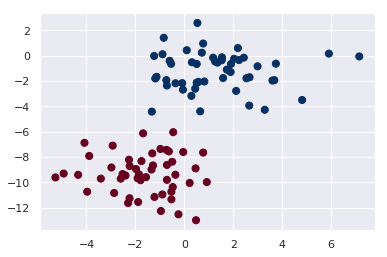

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');


One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

[(-15, 5), (-8, 8)]

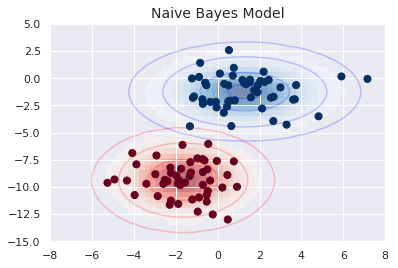

In [0]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

With this generative model in place for each class, we have a simple recipe to compute the likelihood $P(features | L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

Now let's generate some new data and predict the label:

In [0]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

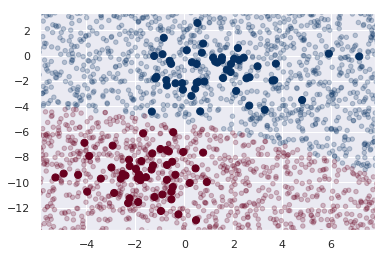

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.23)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

Predict the label of the new data

This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively. 

The downside of Naive Bayes is that the Naive assumption (that all input dimensions are independent) is most often incorrect.

##Gaussian classifier on Iris dataset

Text(89.18, 0.5, 'Predicted')

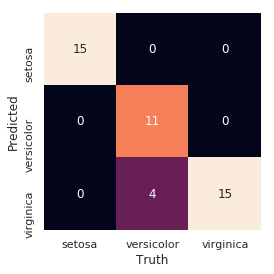

In [0]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import data
training = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')


# Create the X, Y, Training and Test
xtrain = training.drop('Species', axis=1)
ytrain = training.loc[:, 'Species']
xtest = test.drop('Species', axis=1)
ytest = test.loc[:, 'Species']


# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(xtrain, ytrain)

# Predict Output 
pred = model.predict(xtest)

# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

##Gaussian classifier on MNIST dataset

Training time: 0:00:00.003507
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.026212 Train size: 898
Test accuracy: 0.9254727474972191
Time to compute test accuracy: 0:00:00.025198 Test size: 899


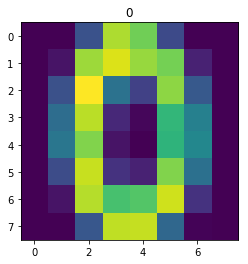

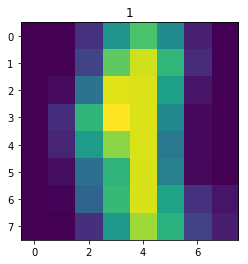

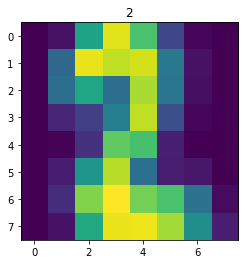

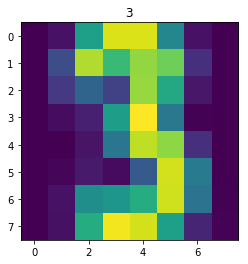

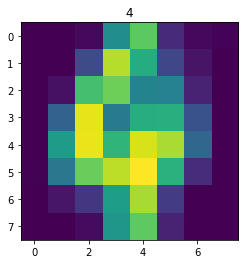

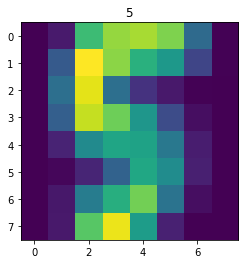

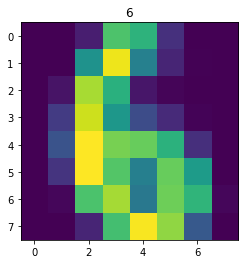

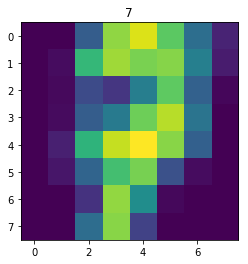

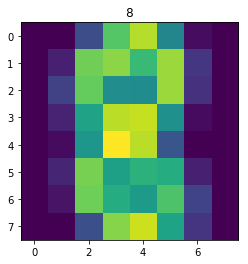

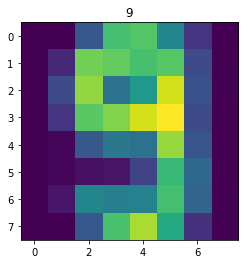

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn import svm, datasets

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


X, Y = datasets.load_digits(return_X_y=True)
Ntrain = len(Y) // 2
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = Bayes()
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

# plot the mean of each class
for c, g in iteritems(model.gaussians):
    plt.imshow(g['mean'].reshape(8, 8))
    plt.title(c)
    plt.show()